In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#Here We will be working on ball by ball data analysis only 
data=pd.read_csv('deliveries.csv')

In [4]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [8]:
data.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
136593,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
136594,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
136595,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
136596,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
136597,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [5]:
#Columns present in Dataset
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 21 columns):
match_id            136598 non-null int64
inning              136598 non-null int64
batting_team        136598 non-null object
bowling_team        136598 non-null object
over                136598 non-null int64
ball                136598 non-null int64
batsman             136598 non-null object
non_striker         136598 non-null object
bowler              136598 non-null object
is_super_over       136598 non-null int64
wide_runs           136598 non-null int64
bye_runs            136598 non-null int64
legbye_runs         136598 non-null int64
noball_runs         136598 non-null int64
penalty_runs        136598 non-null int64
batsman_runs        136598 non-null int64
extra_runs          136598 non-null int64
total_runs          136598 non-null int64
player_dismissed    6727 non-null object
dismissal_kind      6727 non-null object
fielder             4871 non-null object
dtype

## Here we will extract following features from this data and visualize with Seaborn.

### Batsman : 
     * Total Runs Scored 
     * Total Balls Faced 
     * Strike Rate
     * Run Scoring Distribution(Sixes,Fours, Singles,Threes, Doubles, Singles, Dotballs)
     * Dismissal Distributions(Caught Out, Bowled Out, Run Out, LBW ,Retired Hurt, Stumped)
 

## Batsman Data Analysis

### Total Run Scored by a Batsman

In [9]:
#Unique number of Batsman
batsman=data['batsman'].unique()

In [10]:
batsman

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah', 'AM Nayar',
       'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul', 'LRPL Taylor',
       'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman', 'A Symonds',
       'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar', 'WPUJC Vaas',
       'RP Singh', 'WP Saha', 'LR Shukla', 'DPMD Jayawardene', 'S Sohal',
       'B Lee', 'PP Cha

In [11]:
#Main Batsman Function
def total_runs(dataset):
    Z=np.zeros(len(batsman))
    for i in range(len(batsman)):
        for j in range(len(data)):
            if batsman[i]==data['batsman'][j]:
                Z[i]=Z[i]+data['batsman_runs'][j]
        
    return(Z)
            
    

In [ ]:
Total_Run=total_runs(data)

### Total Balls faced by a Batsman

In [13]:
# Ball Faced Function
def ball_faced(dataset):
    Z=np.zeros(len(batsman))
    for i in range(len(batsman)):
        for j in range(len(data)):
            if batsman[i]==data['batsman'][j]:
                Z[i]=Z[i]+1
        
    return(Z)

In [ ]:
Balls_Faced=ball_faced(data)

### Strike Rate: (Total Run Scored / Balls Faced)

In [ ]:
Strike_Rate=Total_Run/Balls_Faced

### Run Scoring Distributions by a Batsman

In [14]:
def runscoring_distribution(dataset):
    
    A=np.zeros(len(batsman))
    B=np.zeros(len(batsman))
    C=np.zeros(len(batsman))
    X=np.zeros(len(batsman))
    Y=np.zeros(len(batsman))
    Z=np.zeros(len(batsman))
    
    for i in range(len(batsman)):
        for j in range(len(data)):
            if batsman[i]==data['batsman'][j]:
                if data['batsman_runs'][j]==6:
                    A[i]=A[i]+1
                elif data['batsman_runs'][j]==4:
                    B[i]=B[i]+1
                elif data['batsman_runs'][j]==3:
                    C[i]=C[i]+1
                elif data['batsman_runs'][j]==2:
                    X[i]=X[i]+1
                elif data['batsman_runs'][j]==1:
                    Y[i]=Y[i]+1
                elif data['batsman_runs'][j]==0:
                    Z[i]=Z[i]+1
        
    return(A,B,C,X,Y,Z)

In [ ]:
sixes,fours,threes,doubles,singles,dots=runscoring_distribution(data)

### Number of Dismissals

In [17]:
#Checking for Missing Values
data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    129871
dismissal_kind      129871
fielder             131727
dtype: int64

In [18]:
#Missing Values Takencare
data['dismissal_kind']=data['dismissal_kind'].fillna(int(0))
data['player_dismissed']=data['player_dismissed'].fillna(int(0))

In [19]:
def dismissal(dataset):
    
    Z=np.zeros(len(batsman))
    for i in range(len(batsman)):
        for j in range(len(data)):
            if (data['batsman'][j]==batsman[i]) & (data['player_dismissed'][j]!=0):
                Z[i]=Z[i]+1
    return (Z)

In [ ]:
Dismissals=dismissal(data)

### Dismissals Distribution

In [22]:
dismissal_type=data['dismissal_kind'].unique()[1:]

In [23]:
dismissal_type

array(['caught', 'bowled', 'run out', 'lbw', 'retired hurt', 'stumped',
       'caught and bowled', 'hit wicket', 'obstructing the field'], dtype=object)

In [26]:
def dismissals_distributions(dataset):
    A=np.zeros(len(Player))
    B=np.zeros(len(Player))
    C=np.zeros(len(Player))
    D=np.zeros(len(Player))
    E=np.zeros(len(Player))
    F=np.zeros(len(Player))
    G=np.zeros(len(Player))
    H=np.zeros(len(Player))
    I=np.zeros(len(Player))
    for i in range(len(batsman)):
        for j in range(len(data.batsman)):
            if batsman[i]== data.batsman[j]:
                if data.dismissal_kind.iloc[j]=='caught':
                    A[i]=A[i]+1
                elif data.dismissal_kind.iloc[j]=='bowled':
                    B[i]=B[i]+1
                elif data.dismissal_kind.iloc[j]=='run out':
                    C[i]=C[i]+1 
                elif data.dismissal_kind.iloc[j]=='lbw':
                    D[i]=D[i]+1
                elif data.dismissal_kind.iloc[j]=='retired hurt':
                    E[i]=E[i]+1
                elif data.dismissal_kind.iloc[j]=='stumped':
                    F[i]=F[i]+1
                elif data.dismissal_kind.iloc[j]=='caught and bowled':
                    G[i]=G[i]+1
                elif data.dismissal_kind.iloc[j]=='hit wicket':
                    H[i]=H[i]+1
                elif data.dismissal_kind.iloc[j]=='obstructing the field':
                    I[i]=I[i]+1
    return(A,B,C,D,E,F,G,H,I)          

In [ ]:
caught,bowled,run,lbw,retired_hurt,stumped,cnb,hit_wicket,obs=dismissals_distribution(data)

### Final Batsman Output

In [28]:
Batsman_Final=pd.DataFrame(data=batsman,columns={"Player Name"})

In [ ]:
sixes,fours,threes,doubles,singles,dots

In [ ]:
Batsman["Runs"]=Total_Run
Batsman["Balls Faced"]=Balls_Faced
Batsman["Strike Rate"]=
Batsman["Sixes"]=sixes
Batsman["Fours"]=fours
Batsman["Threes"]=threes
Batsman["Twos"]=doubles
Batsman["Ones"]=singles
Batsman["Dot Balls"]=dots
Batsman["Dismissals"]=Dismissals
Batsman["Caught Out"]=caught
Batsman["Bowled"]=bowled
Batsman["Run Out"]=run
Batsman["LBW"]=lbw
Batsman["Retired Hurt"]=retired_hurt
Batsman["Stumped"]=stumped
Batsman["Caught and Bowled"]=cnb
Batsman["Hit Wicket"]=hit_wicket
Batsman["Obstruted"]=obs

In [36]:
Batsman.head(20)

,Player Name,Runs,Balls Faced,Strike Rate,Sixes,Fours,Threes,Twos,Ones,Dot Balls,Dismissals,Caught Out,Bowled,Run Out,LBW,Retired Hurt,Stumped,Caught and Bowled,Hit Wicket,Obstructed Field
0,SC Ganguly,1349.0,1326.0,101.734540,42.0,137.0,3.0,54.0,427.0,662.0,54.0,37,9,3,2,0,2,1,0,0
1,BB McCullum,2435.0,1954.0,124.616172,106.0,248.0,3.0,94.0,610.0,893.0,89.0,53,14,6,13,0,2,1,0,0
2,RT Ponting,91.0,129.0,70.542636,2.0,5.0,0.0,6.0,47.0,69.0,8.0,5,0,0,1,0,1,1,0,0
3,DJ Hussey,1322.0,1101.0,120.072661,60.0,90.0,2.0,72.0,452.0,425.0,49.0,32,9,6,1,0,1,0,0,0
4,Mohammad Hafeez,64.0,84.0,76.190476,2.0,7.0,0.0,0.0,24.0,51.0,8.0,6,1,1,0,0,0,0,0,0
5,R Dravid,2174.0,1918.0,113.347237,28.0,269.0,1.0,118.0,681.0,819.0,77.0,47,16,6,2,0,1,5,0,0
6,W Jaffer,130.0,129.0,100.775194,3.0,14.0,1.0,6.0,41.0,64.0,7.0,7,0,0,0,0,0,0,0,0
7,V Kohli,4115.0,3237.0,127.123880,149.0,361.0,10.0,222.0,1303.0,1192.0,115.0,68,23,13,6,0,3,2,0,0
8,JH Kallis,2427.0,2291.0,105.936272,44.0,255.0,8.0,113.0,888.0,982.0,89.0,60,16,9,3,0,0,1,0,0
9,CL White,971.0,774.0,125.452196,38.0,76.0,2.0,49.0,335.0,274.0,35.0,22,4,4,1,0,1,3,0,0


## Output CSV file

In [39]:
Batsman.to_csv("Batsman_Data.csv",index=False)

## Visualization

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Total Run

In [46]:
Batsman.index=Batsman["Player Name"]
Batsman.drop('Player Name',axis=1,inplace=True)

In [50]:
## Top 10 Run Scorer
Batsman.sort_values(by='Runs',ascending=False).head(10)

,Runs,Balls Faced,Strike Rate,Sixes,Fours,Threes,Twos,Ones,Dot Balls,Dismissals,Caught Out,Bowled,Run Out,LBW,Retired Hurt,Stumped,Caught and Bowled,Hit Wicket,Obstructed Field
Player Name,,,,,,,,,,,,,,,,,,,
V Kohli,4115.0,3237.0,127.123880,149.0,361.0,10.0,222.0,1303.0,1192.0,115.0,68,23,13,6,0,3,2,0,0
SK Raina,4106.0,3059.0,134.226872,161.0,360.0,10.0,219.0,1227.0,1081.0,122.0,87,9,9,3,0,7,7,0,0
RG Sharma,3874.0,2996.0,129.305741,164.0,323.0,2.0,163.0,1261.0,1082.0,121.0,77,17,15,4,0,3,5,0,0
G Gambhir,3634.0,3028.0,120.013210,51.0,422.0,15.0,222.0,1151.0,1167.0,117.0,66,25,13,7,0,2,4,0,0
CH Gayle,3451.0,2360.0,146.228814,252.0,282.0,3.0,67.0,668.0,1088.0,81.0,47,22,2,6,0,2,2,0,0
RV Uthappa,3390.0,2721.0,124.586549,104.0,341.0,11.0,182.0,990.0,1090.0,119.0,78,11,10,10,0,7,3,0,0
DA Warner,3373.0,2440.0,138.237705,134.0,338.0,11.0,177.0,830.0,950.0,91.0,56,17,8,3,0,4,2,1,0
MS Dhoni,3270.0,2419.0,135.179826,140.0,236.0,11.0,231.0,991.0,810.0,92.0,60,10,15,2,0,2,3,0,0
AB de Villiers,3270.0,2231.0,146.571044,142.0,275.0,12.0,182.0,918.0,702.0,78.0,48,17,3,6,0,3,1,0,0


Text(0,0.5,'Runs Scored')

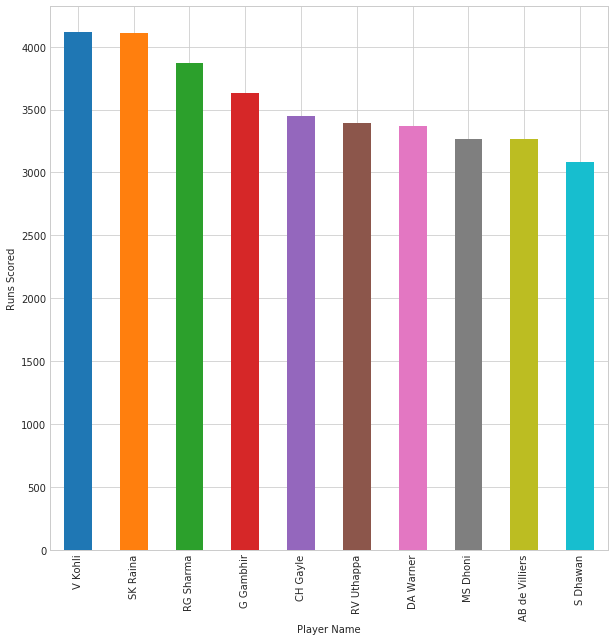

In [70]:
## Top 10 Run Scorer
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
(Batsman.sort_values(by='Runs',ascending=False).head(10)['Runs']).plot(kind='bar')
plt.ylabel("Runs Scored")

### Most Sixes

In [73]:
## Most Number of 6(Top 10)
Batsman.sort_values(by='Sixes',ascending=False).head(10)['Sixes'].astype('int')

Player Name
CH Gayle          252
RG Sharma         164
SK Raina          161
V Kohli           149
YK Pathan         143
AB de Villiers    142
MS Dhoni          140
DA Warner         134
Yuvraj Singh      133
KA Pollard        125
Name: Sixes, dtype: int64

Text(0,0.5,'Number of Sixes')

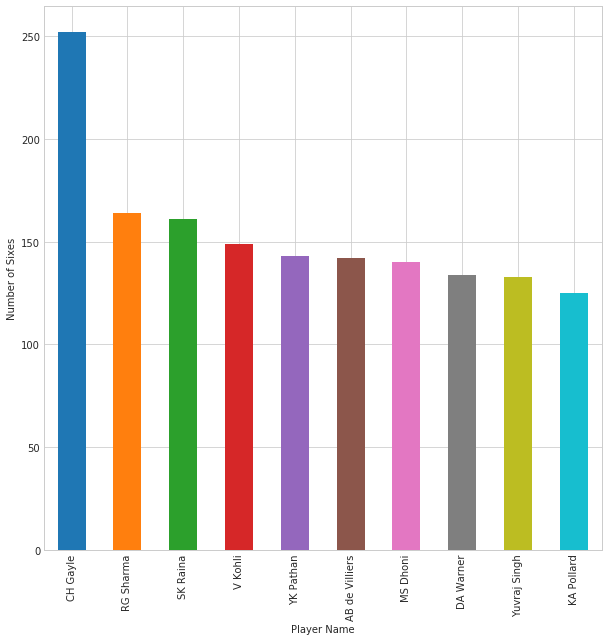

In [75]:
plt.figure(figsize=(10,10))
Batsman.sort_values(by='Sixes',ascending=False).head(10)['Sixes'].astype('int').plot(kind='bar')
plt.ylabel("Number of Sixes")

### Number of Fours

In [77]:
#Top 10
Batsman.sort_values(by='Fours',ascending=False).head(10)['Fours'].astype('int')

Player Name
G Gambhir       422
V Kohli         361
SK Raina        360
S Dhawan        348
RV Uthappa      341
DA Warner       338
V Sehwag        334
RG Sharma       323
SR Tendulkar    296
AM Rahane       285
Name: Fours, dtype: int64

Text(0,0.5,'Number of Fours')

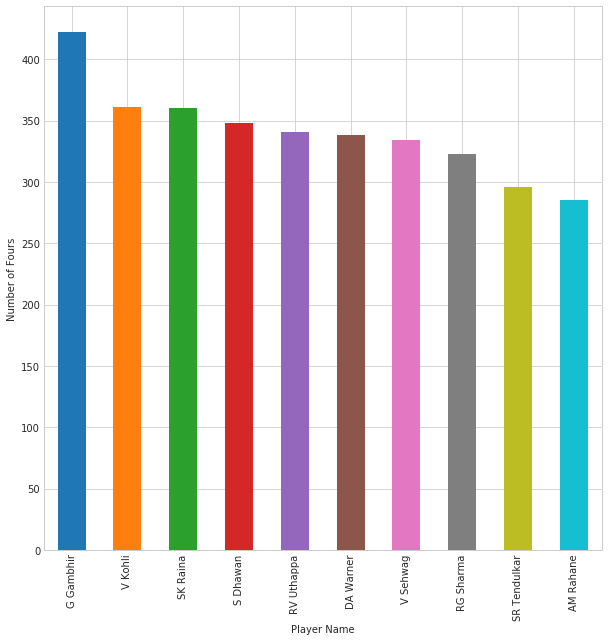

In [79]:
plt.figure(figsize=(10,10))
Batsman.sort_values(by='Fours',ascending=False).head(10)['Fours'].astype('int').plot(kind='bar')
plt.ylabel("Number of Fours")